<a href="https://colab.research.google.com/github/Vaishnavi-Devi-N/CapstoneProjectEDA/blob/main/EDA_project_on_hotel_booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/Almabetter/CSV of pandas projects /Hotel_Bookings.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
link = 'https://github.com/Vaishnavi-Devi-N/CapstoneProjectEDA/raw/main/Hotel%20Bookings.csv'
data = pd.read_csv(link)

Step 1: Remove duplicate or irrelevant observations. Remove unwanted observations from your dataset, including duplicate observations or irrelevant observations. ...

Step 2: Fix structural errors. ...

Step 3: Filter unwanted outliers. ...

Step 4: Handle missing data. ...

Step 5: Validate and QA.

In [25]:
duplicate_data = pd.read_csv(link)

In [26]:
data.isna().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

**Handling duplicate**

In [27]:
data.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [28]:
data.shape

(119390, 32)

In [29]:
data.drop_duplicates(inplace = True)

In [30]:
data.shape

(87396, 32)

In [31]:
data.duplicated().value_counts()

False    87396
dtype: int64

**Handling null values**

In [32]:
data['company'].fillna('not company sponsored', inplace = True)

In [33]:
data['country'].fillna('others', inplace = True)

In [34]:
data['children'].fillna(0, inplace = True)

In [35]:
data['agent'].fillna('self booking', inplace = True)

In [36]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [37]:
#data wrangling step

In [38]:
value_counts_result = data.value_counts()  # Calculate value counts
print(value_counts_result)

hotel         is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent         company                days_in_waiting_list  customer_type  adr    required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
City Hotel    0            0          2015               August              31                        1                          0                        1                     2       0.0       0       BB    PRT      Direct          Direct                0                  0                       0                               A                   A                   0                No Deposit    self booking  n

In [39]:
data_copy = data.copy()

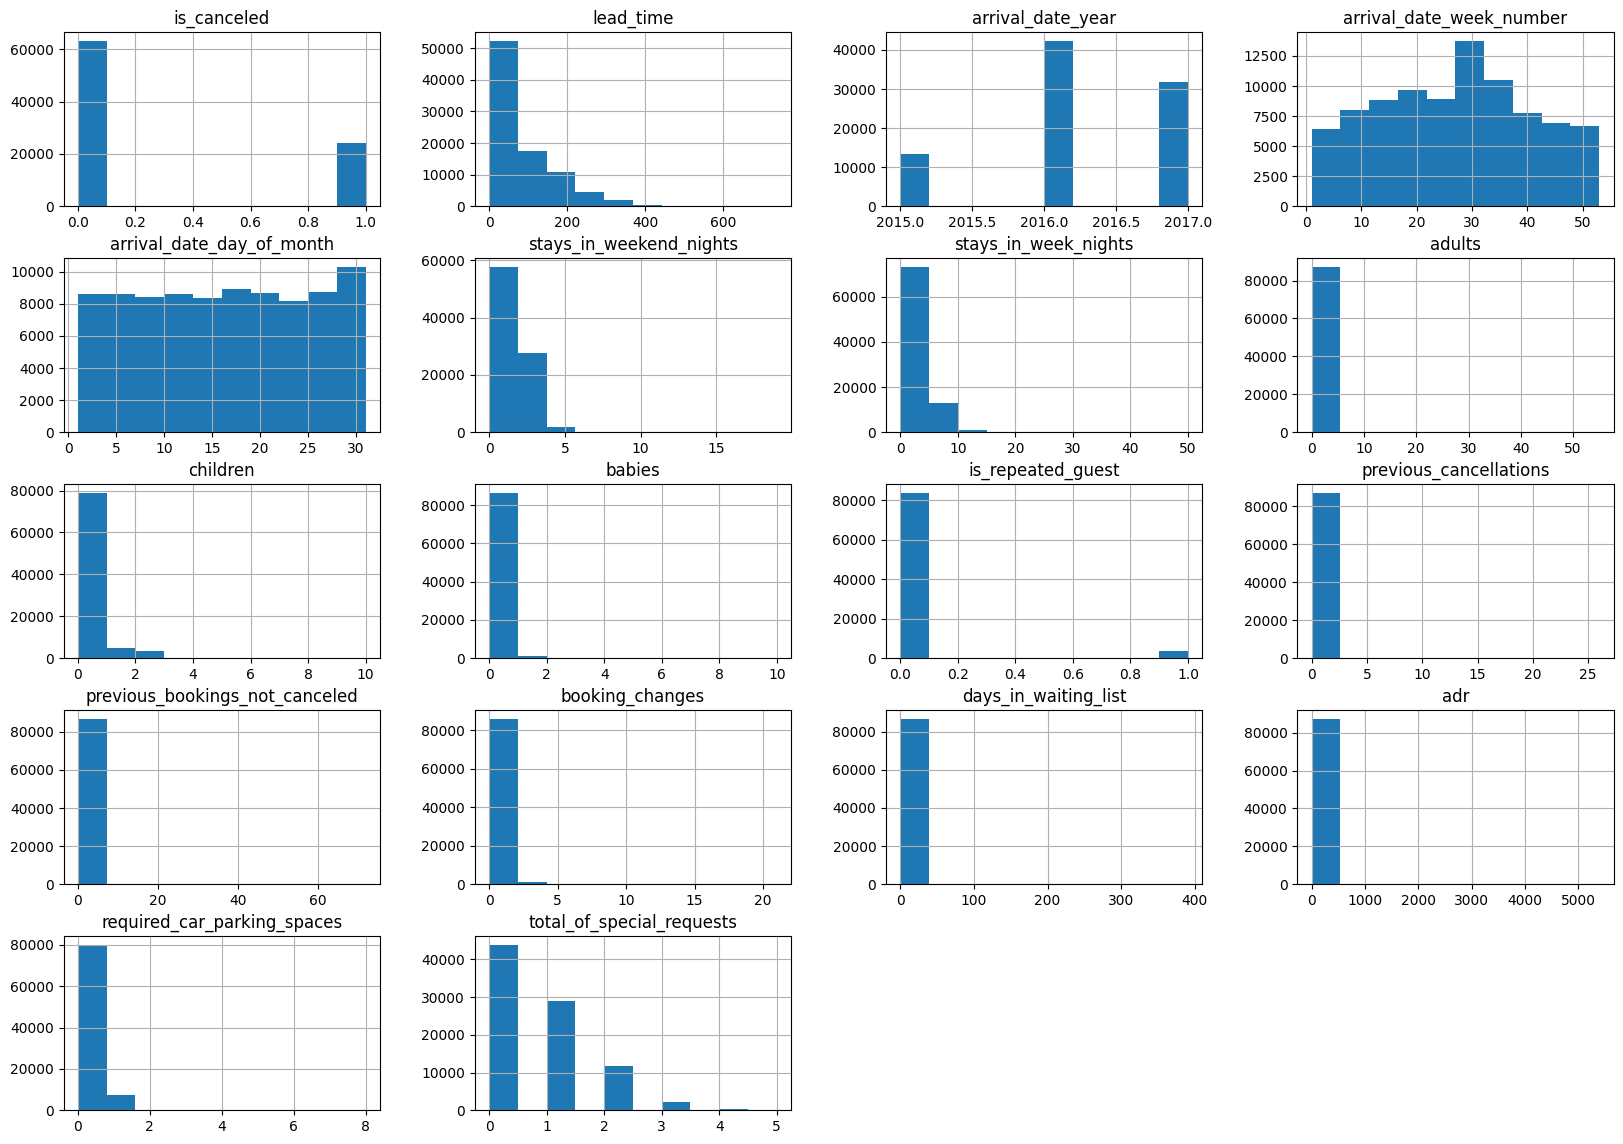

In [41]:
data.hist(figsize=(20,14))
plt.show()

In [40]:
data_copy.set

AttributeError: ignored